HW5.2# Linear-Regression

#Importing the libraries and dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Tayko.csv')
df.head
df.dtypes

sequence_number           int64
US                        int64
source_a                  int64
source_c                  int64
source_b                  int64
source_d                  int64
source_e                  int64
source_m                  int64
source_o                  int64
source_h                  int64
source_r                  int64
source_s                  int64
source_t                  int64
source_u                  int64
source_p                  int64
source_x                  int64
source_w                  int64
Freq                      int64
last_update_days_ago      int64
1st_update_days_ago       int64
Web order                 int64
Gender=male               int64
Address_is_res            int64
Purchase                  int64
Spending                  int64
Partition                object
Unnamed: 26             float64
Unnamed: 27             float64
dtype: object

In [ ]:
df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending,Unnamed: 26,Unnamed: 27
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,0.0,0.0
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.62500,NaN,NaN
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.78261,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,NaN
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,NaN
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,2.00000,NaN,NaN
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,153.00000,NaN,NaN
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.00000,NaN,NaN


#a) Exploration (2 scatters plots)

a) Explore the relationship between Spending and each of the two
continuous variables by creating two scatters plots (SPENDING
vs. FREQ and SPENDING vs. LAST_UPDATE). Does there
seem to be a linear relationship there? => Capture Screen !

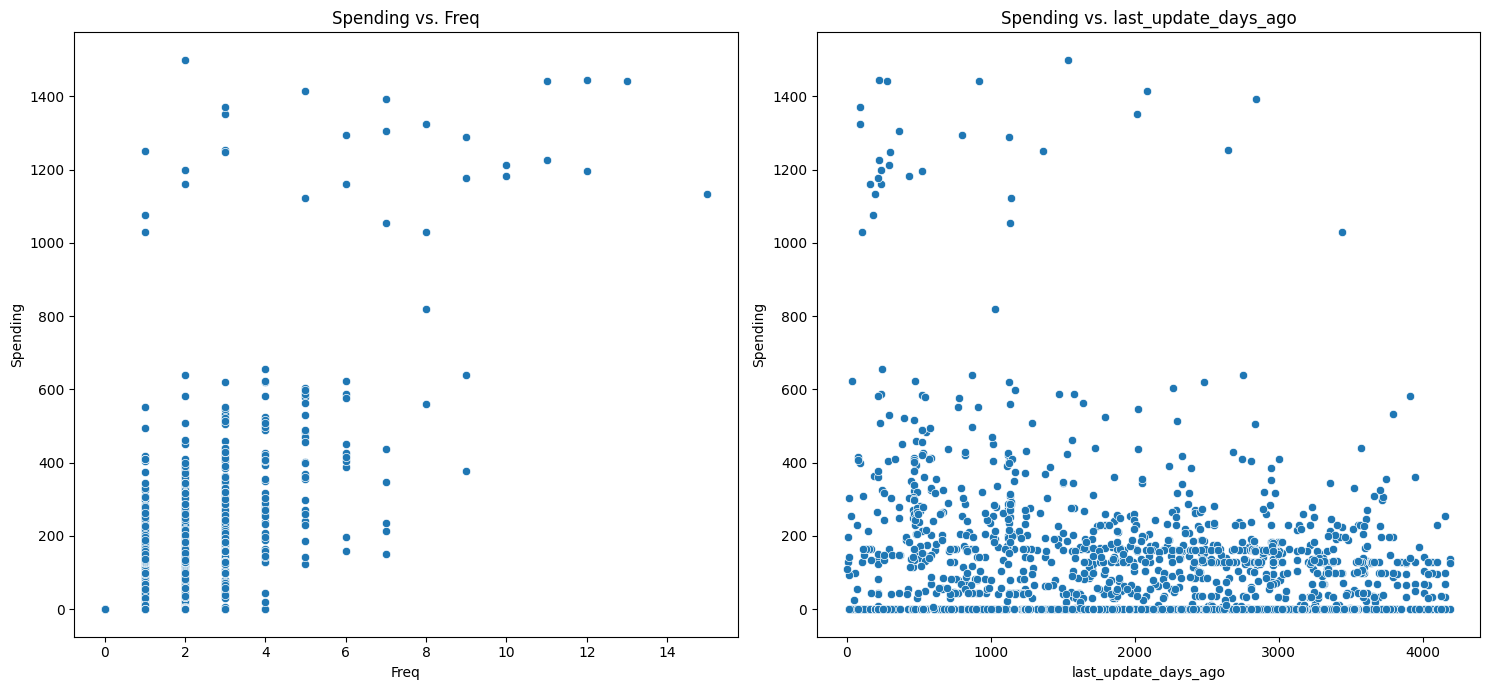

In [ ]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Freq', y='Spending')
plt.title('Spending vs. Freq')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='last_update_days_ago', y='Spending')
plt.title('Spending vs. last_update_days_ago')

plt.tight_layout()
plt.show()

#b) Fitting first model (6 predictors)

b) Fit a predictive model for SPENDING using only the following
predictors: Freq, Last_update, Web_order, Gender, US,
Adress_is_res [Use all these features]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np

# Load and filter the data to include only records with 'Purchase' == 1
df = df[df['Purchase'] == 1]

# Define the features and target variable
predictors = ['Freq', 'last_update_days_ago', 'Web order', 'Gender=male', 'US', 'Address_is_res']
X = df[predictors]
y = df['Spending']

# Partition the data into training and test sets
X_train = X[df['Partition'] == 't']
y_train = y[df['Partition'] == 't']
X_test = X[df['Partition'] == 'v']
y_test = y[df['Partition'] == 'v']

# Standardize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the initial linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Print the coefficients and intercept of the initial model
print("Features:", X_train.columns.tolist())
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Features: ['Freq', 'last_update_days_ago', 'Web order', 'Gender=male', 'US', 'Address_is_res']
Coefficients: [155.95020921 -28.21799529   0.76905178   2.15133686  16.33333742
 -38.55799405]
Intercept: 207.78364116094986


In [ ]:
# Make predictions on the test data set
y_pred = model.predict(X_test_scaled)

# Calculate and print the Mean Squared Error (MSE) of the initial model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate and print the R-squared value of the initial model
r_squared = model.score(X_test_scaled, y_test)
print("R-squared:", r_squared)

# Add a constant term for the OLS model and fit the model
X_train_const = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_train_const).fit()

# Get and print the p-values of the predictors
p_values = model_sm.pvalues
print("P-values of predictors:", p_values)

Mean Squared Error (MSE): 27059.971822927855
R-squared: 0.4417496100433478
P-values of predictors: const    3.571133e-78
x1       6.320007e-47
x2       2.643790e-03
x3       9.293012e-01
x4       8.029935e-01
x5       6.146229e-02
x6       1.251535e-05
dtype: float64


In [ ]:
# Identify and print non-significant predictors (p-value > 0.05)
non_significant_predictors = [predictors[i-1] for i in range(1, len(predictors)+1) if p_values[i] > 0.05]
print("Non-significant predictors (P-value > 0.05):", non_significant_predictors)

#non_significant_predictors = p_values[p_values > 0.05].index.tolist()
#print("Non-significant predictors (P-value > 0.05):", non_significant_predictors)

Non-significant predictors (P-value > 0.05): ['Web order', 'Gender=male', 'US']


#c) Fitting second model (best predictors)

c) Fit a second predictive model for SPENDING using your best
predictors:

    1) Apply multiple linear regression to create a spending prediction model. Then, give the regression equation 2.
    2) Displays the prediction results of the purchase amount in the first record of the test data set, along with indicating the error obtained.
    3) Give the performance of the model (error) on the test data set.



In [ ]:
# Define the best predictors (with p-value < 0.05)
best_predictors = ['Freq', 'Gender=male', 'US', 'Address_is_res']
X_train_best = X_train[best_predictors]
X_test_best = X_test[best_predictors]

In [ ]:
# Standardize the best predictors
scaler_best = StandardScaler().fit(X_train_best)
X_train_best_scaled = scaler_best.transform(X_train_best)
X_test_best_scaled = scaler_best.transform(X_test_best)

# Fit the second linear regression model using the best predictors
model_best = LinearRegression()
model_best.fit(X_train_best_scaled, y_train)

# Get the coefficients and intercept of the second model
coefficients_best = model_best.coef_
intercept_best = model_best.intercept_

# Print the best features, their coefficients, and the intercept
print("Best Features:", best_predictors)
print("Coefficients:", coefficients_best)
print("Intercept:", intercept_best)

Best Features: ['Freq', 'Gender=male', 'US', 'Address_is_res']
Coefficients: [165.89628709   2.61763221  12.38904939 -37.85400061]
Intercept: 207.78364116094986


In [ ]:
# Construct and print the regression equation for the second model
regression_equation_2 = f"Spending = {intercept_best:.2f} " + " ".join([f"+ {coef:.2f}*{name}" for coef, name in zip(coefficients_best, best_predictors)])
print("Regression Equation 2:")
print(regression_equation_2)

Regression Equation 2:
Spending = 207.78 + 165.90*Freq + 2.62*Gender=male + 12.39*US + -37.85*Address_is_res


In [ ]:
# Predict spending for the first record in the test data set
first_record = X_test_best_scaled[0].reshape(1, -1)
predicted_spending_first = model_best.predict(first_record)[0]
actual_spending_first = y_test.iloc[0]
error_first = abs(predicted_spending_first - actual_spending_first)

# Print the predicted and actual spending for the first record, and the error
print("Predicted Spending for First Record:", predicted_spending_first)
print("Actual Spending for First Record:", actual_spending_first)
print("Error for First Record:", error_first)

Predicted Spending for First Record: 117.11456222149951
Actual Spending for First Record: 174
Error for First Record: 56.88543777850049


In [ ]:
# Make predictions on the test data set using the second model
y_pred_best = model_best.predict(X_test_best_scaled)

# Calculate and print the Mean Squared Error (MSE) of the second model on the test data set
mse_best = mean_squared_error(y_test, y_pred_best)
print("Mean Squared Error (MSE) on Test Data Set:", mse_best)

Mean Squared Error (MSE) on Test Data Set: 27356.521459261934
